In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.python.keras import backend as k

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

import cv2 as cv

import seaborn as sns

In [2]:
PATH = os.path.join('E:\sample')

In [3]:
train_dir = os.path.join(PATH, 'Train30')
validation_dir = os.path.join(PATH, 'Val30')

In [1]:
Train_Set="E:\sample\Train30"
Val_Set="E:\sample\Val30"

#Categroized images
#4 types of subCategories

CATEGORIES=["Double","Triple","Trash"]

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [6]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 48
IMG_WIDTH = 48

In [7]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 11531 images belonging to 3 classes.


In [8]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2401 images belonging to 3 classes.


In [9]:
Train_Data=[]
import cv2 as cv
for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(Train_Set,category)
        
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1) ## 0-for Greyscale ,, 1--for RGB...
            #img = tf.image.rgb_to_grayscale(img, name=None)
            Train_Data.append([img,label])

In [10]:
Test_Data=[]

for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(Val_Set,category)
        
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            #img = tf.image.rgb_to_grayscale(img, name=None)
            Test_Data.append([img,label])

In [11]:
print(len(Train_Data))
print(len(Test_Data))

11531
2401


In [12]:
import random

random.shuffle(Train_Data)


In [13]:
for lbl in Train_Data[:10]:
    print(lbl[1])

1
0
1
0
0
2
2
2
0
0


In [14]:
train_X=[]
train_y=[]

for features,label in Train_Data:
    train_X.append(features)
    train_y.append(label)

len(train_X),len(train_y)

(11531, 11531)

In [15]:
#lets seprate the feature and target variable
test_X=[]
test_y=[]

for features,label in Test_Data:
    test_X.append(features)
    test_y.append(label)

len(test_X),len(test_y)

(2401, 2401)

In [16]:

train_X=np.array(train_X).reshape(-1,48,48,3)
train_X=train_X/255.0
train_X.shape

(11531, 48, 48, 3)

In [17]:
test_X=np.array(test_X).reshape(-1,48,48,3)
test_X=test_X/255.0
test_X.shape

(2401, 48, 48, 3)

In [18]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

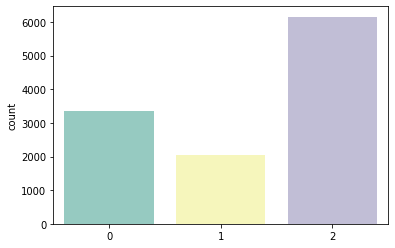

In [19]:
sns.countplot(train_y,palette='Set3')

In [20]:
from keras.utils import to_categorical
#train y
one_hot_train=to_categorical(train_y)
one_hot_train

Using TensorFlow backend.


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [21]:
one_hot_test=to_categorical(test_y)
one_hot_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [22]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [23]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten,BatchNormalization
from keras.applications import vgg16 

from keras.preprocessing import image

In [25]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides = (1, 1), activation = 'relu', input_shape = (48, 48, 3)))
model.add(MaxPool2D(pool_size = (2,2)))
##model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), strides = (1, 1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
##model.add(Dropout(0.1))

model.add(Conv2D(128, (3,3), strides = (1,1), activation = 'relu'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(1024, activation = 'relu'))
#model.add(BatchNormalization())

#model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
__________

In [27]:
hist=model.fit(train_X,one_hot_train,epochs=25,batch_size=32,validation_data=(test_X,one_hot_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 11531 samples, validate on 2401 samples
Epoch 1/25





11531/11531 [==============================] - 18s 2ms/step - loss: 0.4699 - acc: 0.8028 - val_loss: 0.2896 - val_acc: 0.8875
Epoch 2/25
11531/11531 [==============================] - 8s 654us/step - loss: 0.3250 - acc: 0.8717 - val_loss: 0.2422 - val_acc: 0.9080
Epoch 3/25
11531/11531 [==============================] - 8s 660us/step - loss: 0.2972 - acc: 0.8842 - val_loss: 0.2293 - val_acc: 0.9121
Epoch 4/25
11531/11531 [==============================] - 8s 664us/step - loss: 0.2607 - acc: 0.8979 - val_loss: 0.2071 - val_acc: 0.9221
Epoch 5/25
11531/11531 [==============================] - 8s 666us/step - loss: 0.2465 - acc: 0.9063 - val_loss: 0.2053 - val_acc: 0.9209
Epoch 6/25
11531/11531 [==============================] - 8s 663us/step - loss: 0.2265 - acc: 0.9148 - val_loss: 0.2190 - val_acc: 0.9159
Epoch 7/25
11531/11531

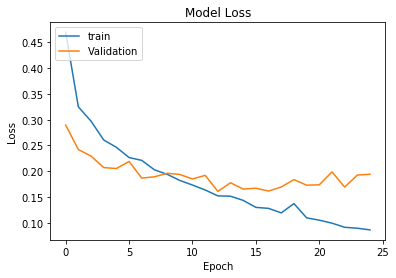

In [28]:
#train and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

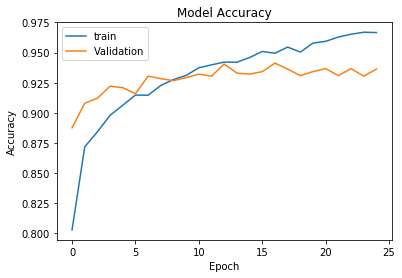

In [29]:
#train and validation accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

In [30]:
y_pred=model.predict_classes(test_X)

In [31]:
#accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(test_y,y_pred)


0.9362765514369012

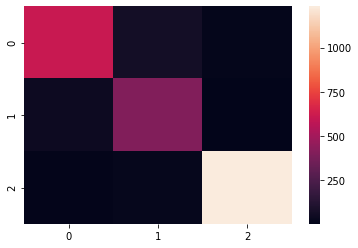

In [32]:
sns.heatmap(confusion_matrix(test_y,y_pred))

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      cm = cm * 100
      print("\nNormalized confusion matrix")
  else:
      print('\nConfusion matrix, without normalization')
  print(cm)
  print ()

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.0f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


In [34]:

y_pred=model.predict_classes(test_X)
cnf_matrix = confusion_matrix(test_y, y_pred)
np.set_printoptions(precision=2) # set NumPy to 2 decimal places

In [35]:
import itertools


Confusion matrix, without normalization
[[ 610   65   14]
 [  44  404    2]
 [  11   17 1234]]



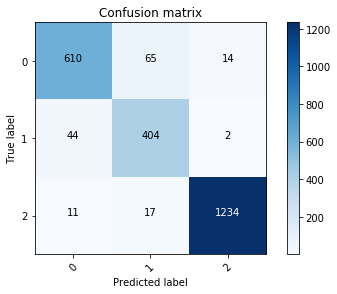

In [41]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2])

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2], normalize=True,
                      title='Normalized confusion matrix')          #-----------------to excel for comparision 

In [39]:

Double = 0
Triple = 0
Trash = 0
Count = 0
Others = 0
image_no = 1
mf = 3.90534192    # Magnification factor in the test file document
A = []
from PIL import Image  
import PIL 
for file in os.listdir(r'E:\TEST results\Test (2)\Others'):
    
    image = Image.open(r'E:\TEST results\Test (2)\Others/'+file)
    #A= image
    image = np.array(image).reshape(-1,48,48,3)
    image = image/255.0
  
    classes = model.predict_classes(image)
    #print(predictions)x
    if classes == 0:
        #name = r'E:\TEST results\Test (1)\Single' + str(image_no) + '.jpg'
        #path = r"E:\TEST results\Test (1)\Single"
        #print(type(A))
        #A.save(r'E:\TEST results\Test (1)\Single\singles'+ str(image_no) + '.jpg','JPEG')
        image_no += 1
        Double += 1
        print("Double")
    elif classes == 1:
        #name = r'E:\verification results\results (1)\Others\image' + str(image_no) + '.jpg'
        #cv.imwrite(name, image)
        #A.save(r'E:\TEST results\Test (1)\Others\Others'+ str(image_no) + '.jpg','JPEG')
        image_no += 1
        Triple += 1
        print("Triple")
    elif classes == 2:
        #name = r'E:\verification results\results (1)\Others\image' + str(image_no) + '.jpg'
        #cv.imwrite(name, image)
        #A.save(r'E:\TEST results\Test (1)\Others\Others'+ str(image_no) + '.jpg','JPEG')
        image_no += 1
        Trash += 1
        print("Trash")
    elif classes == 3:
        #name = r'E:\verification results\results (1)\Others\image' + str(image_no) + '.jpg'
        #cv.imwrite(name, image)
        #A.save(r'E:\TEST results\Test (1)\Others\Others'+ str(image_no) + '.jpg','JPEG')
        image_no += 1
        Trash += 1
        print("Double")
        

Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Triple
Trash


In [40]:
print(Double,Triple,Trash)

0 386 1


In [38]:
model.save('may_fifth.h5')

In [39]:
model.save('25_april.h5')

In [39]:
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

NameError: name 'class_names' is not defined

In [ ]:
sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.1%', cmap='Blues')

In [ ]:
sns.heatmap(matrix, cbar=False)

In [ ]:
import matplotlib.pyplot as plt
import numpy
from numpy import ravel, reshape, swapaxes
import scipy.io
from sklearn import svm
from sklearn.metrics import confusion_matrix
from random import sample